In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Optimal labor: 4.999999999999999, optimal capital: 5.000000000000001
Output: 20.000000000000004
Price before wage increase: 4.999999999999999
Optimal consumption: 8.014922293820632, Optimal imports: 59.925388530896846
Utility before wage increase: 775.452181787875
Optimal labor with increased wages: 2.665978882743215, optimal capital: 6.001031675885177
Output with increased wages: 16.66666648187484
Price with increased wages: 6.0000000665250575
Optimal consumption with increased wages: 6.497564483373466, Optimal imports with increased wages: 61.01461266379321
Utility after wage increase: 721.5318514904903
Loss in welfare: 53.92033029738468


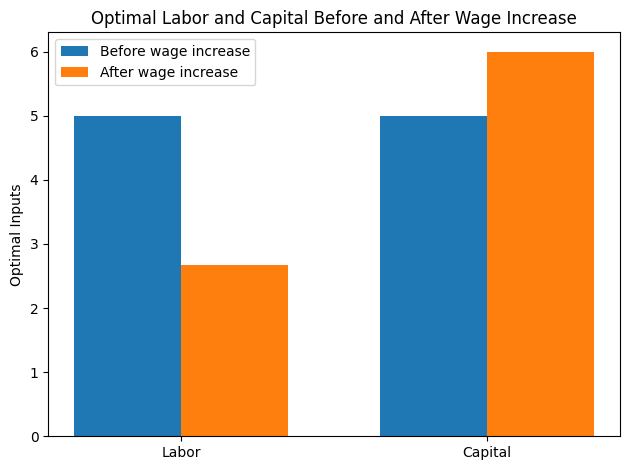

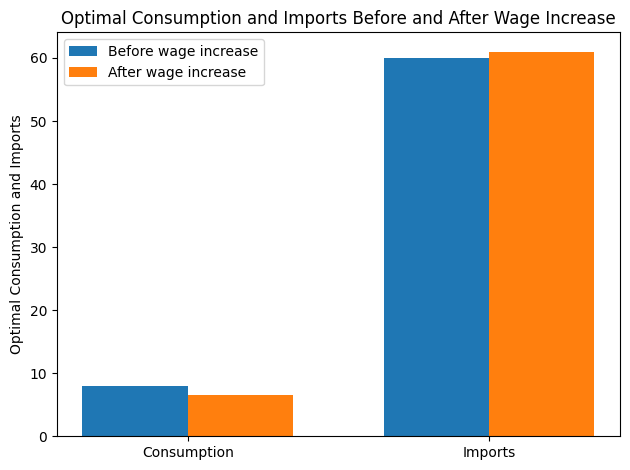

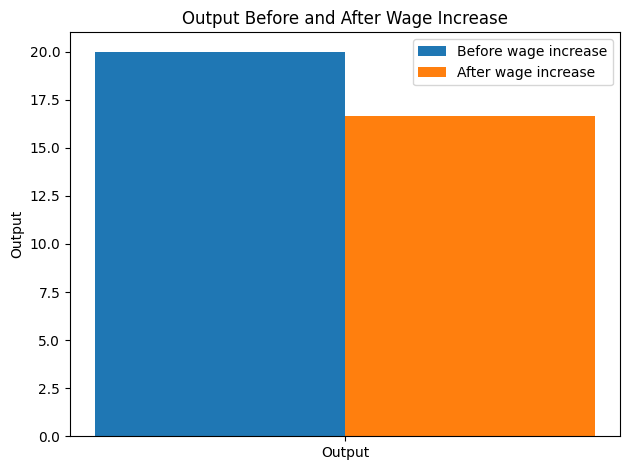

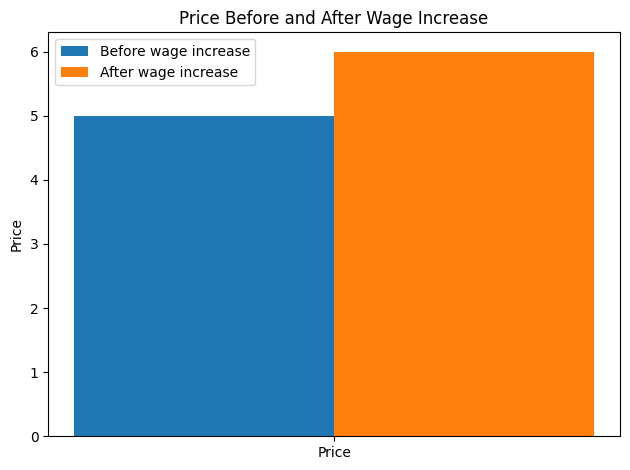

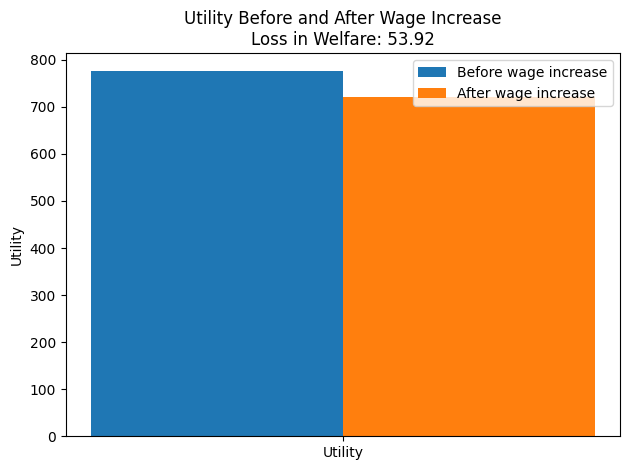

In [2]:
# CES production function
def production_function(inputs, rho):
    labor, capital = inputs
    return -((labor**rho + capital**rho)**(1/rho))  # We will minimize the negative of the production function to achieve maximization

# Budget constraint for the firm
def budget_constraint(inputs, wages, interest_rate, budget):
    labor, capital = inputs
    return budget - (wages*labor + interest_rate*capital)

# CES utility function for the consumer
def utility(inputs, sigma):
    x, m = inputs
    return -((x**sigma + m**sigma)**(1/sigma))  # We will minimize the negative of the utility function to achieve maximization

# Budget constraint for the consumer
def consumer_budget_constraint(inputs, price, price_m, income):
    x, m = inputs
    return income - price*x - price_m*m

# Initial prices
wages = 10
interest_rate = 10
price = 1  # Initial price for the firm's good
price_m = 1  # Initial price for the imported good
income = 100  # Consumer's income

# Budget for the firm
budget = 100

# Initial inputs
labor = 10
capital = 10

# Substitution parameters for the CES functions
rho = 0.5  # For the production function
sigma = 0.2  # For the utility function

# Bounds
bounds = ((0, None), (0, None))

# Optimize inputs for the firm
cons_firm = ({'type': 'eq', 'fun': budget_constraint, 'args': [wages, interest_rate, budget]})
res = minimize(production_function, [labor, capital], method='SLSQP', bounds=bounds, constraints=cons_firm, args=(rho))
labor_opt, capital_opt = res.x
print(f"Optimal labor: {labor_opt}, optimal capital: {capital_opt}")

# Output
output = (labor_opt**rho + capital_opt**rho)**(1/rho)
print(f"Output: {output}")

# Price as marginal cost
price = (wages*labor_opt + interest_rate*capital_opt) / output
print(f"Price before wage increase: {price}")

# Optimize consumption for the consumer
cons_consumer = ({'type': 'eq', 'fun': consumer_budget_constraint, 'args': [price, price_m, income]})
res = minimize(utility, [output, output], method='SLSQP', bounds=[(0, None), (0, None)], constraints=cons_consumer, args=(sigma))
consumption_opt, imports_opt = res.x
print(f"Optimal consumption: {consumption_opt}, Optimal imports: {imports_opt}")

# Utility before the wage increase
utility_before = (consumption_opt**sigma + imports_opt**sigma)**(1/sigma)
print(f"Utility before wage increase: {utility_before}")

# Increase wages
wages = 15

# Optimize inputs for the firm
cons_firm = ({'type': 'eq', 'fun': budget_constraint, 'args': [wages, interest_rate, budget]})
res = minimize(production_function, [labor, capital], method='SLSQP', bounds=bounds, constraints=cons_firm, args=(rho))
labor_opt2, capital_opt2 = res.x
print(f"Optimal labor with increased wages: {labor_opt2}, optimal capital: {capital_opt2}")

# Output
output2 = (labor_opt2**rho + capital_opt2**rho)**(1/rho)
print(f"Output with increased wages: {output2}")

# Price as marginal cost
price2 = (wages*labor_opt2 + interest_rate*capital_opt2) / output2
print(f"Price with increased wages: {price2}")

# Optimize consumption for the consumer
cons_consumer = ({'type': 'eq', 'fun': consumer_budget_constraint, 'args': [price2, price_m, income]})
res = minimize(utility, [output2, output2], method='SLSQP', bounds=[(0, None), (0, None)], constraints=cons_consumer, args=(sigma))
consumption_opt2, imports_opt2 = res.x
print(f"Optimal consumption with increased wages: {consumption_opt2}, Optimal imports with increased wages: {imports_opt2}")

# Utility after the wage increase
utility_after = (consumption_opt2**sigma + imports_opt2**sigma)**(1/sigma)
print(f"Utility after wage increase: {utility_after}")

# Loss in welfare
loss_in_welfare = utility_before - utility_after
print(f"Loss in welfare: {loss_in_welfare}")

# Bar chart for labor and capital
labels = ['Labor', 'Capital']
before_wage_increase = [labor_opt, capital_opt]
after_wage_increase = [labor_opt2, capital_opt2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_wage_increase, width, label='Before wage increase')
rects2 = ax.bar(x + width/2, after_wage_increase, width, label='After wage increase')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Optimal Inputs')
ax.set_title('Optimal Labor and Capital Before and After Wage Increase')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Bar chart for consumption and imports
labels = ['Consumption', 'Imports']
before_wage_increase = [consumption_opt, imports_opt]
after_wage_increase = [consumption_opt2, imports_opt2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_wage_increase, width, label='Before wage increase')
rects2 = ax.bar(x + width/2, after_wage_increase, width, label='After wage increase')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Optimal Consumption and Imports')
ax.set_title('Optimal Consumption and Imports Before and After Wage Increase')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Bar chart for Output
labels = ['Output']
before_wage_increase = [output]
after_wage_increase = [output2]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_wage_increase, width, label='Before wage increase')
rects2 = ax.bar(x + width/2, after_wage_increase, width, label='After wage increase')

ax.set_ylabel('Output')
ax.set_title('Output Before and After Wage Increase')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Bar chart for Price
labels = ['Price']
before_wage_increase = [price]
after_wage_increase = [price2]

x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_wage_increase, width, label='Before wage increase')
rects2 = ax.bar(x + width/2, after_wage_increase, width, label='After wage increase')

ax.set_ylabel('Price')
ax.set_title('Price Before and After Wage Increase')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Bar chart for Utility with Loss in Welfare
labels = ['Utility']
before_wage_increase = [utility_before]
after_wage_increase = [utility_after]

x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_wage_increase, width, label='Before wage increase')
rects2 = ax.bar(x + width/2, after_wage_increase, width, label='After wage increase')

ax.set_ylabel('Utility')
ax.set_title('Utility Before and After Wage Increase\nLoss in Welfare: {:.2f}'.format(loss_in_welfare))
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()